In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PIL import Image
import numpy as np
from pathlib import Path
from collections import deque
import random, datetime, os, copy

# Gym is an OpenAI toolkit for RL
import gym

In [3]:
# tensorflow
import tensorflow as tf
# from tf_agents.environments import tf_py_environment
# from tf_agents.policies import policy_loader
# from tf_agents.trajectories import time_step as ts_lib

# gym stuff
import gym
from gym.wrappers.monitoring.video_recorder import VideoRecorder
#from tf_agents.typing.types import PyEnv

# multigrid
from social_rl import gym_multigrid
from social_rl.adversarial_env import adversarial_env
from social_rl.multiagent_tfagents import multiagent_gym_suite

['black', 'blue', 'chartreuse', 'green', 'grey', 'lamourestbrun', 'purple', 'red', 'teal', 'yellow']


ModuleNotFoundError: No module named 'tf_agents'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Multigrid demo of video capture

In [5]:
from social_rl.adversarial_env.domain_transfer_experiments_2 import BaseEnv, AdvEnv, load_agent, plot_obs

INFO:tensorflow:Enabling eager execution


INFO:tensorflow:Enabling eager execution


INFO:tensorflow:Enabling v2 tensorshape


INFO:tensorflow:Enabling v2 tensorshape


INFO:tensorflow:Enabling resource variables


INFO:tensorflow:Enabling resource variables


INFO:tensorflow:Enabling tensor equality


INFO:tensorflow:Enabling tensor equality


INFO:tensorflow:Enabling control flow v2


INFO:tensorflow:Enabling control flow v2


In [6]:
from social_rl.gym_multigrid.envs.adversarial import COLOR_TO_IDX, IDX_TO_COLOR, COLORS

In [18]:
sequence=[24, 0, 2, 3, 4, 7, 8, 13, 19, 27, 30, 35, 36, 41, 46, 50, 59, 61, 66, 69, 78, 79, 85, 92, 101, 105, 110, 111, 125, 148]
# sequence=[12, 0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

corridor = AdvEnv(sequence=sequence, #colors=None,
#                   colors=[5, 1, 6],  # wall, goal, floor: gray, green, black
#                   video_fp="videos/adversary.mp4"
                 )

In [24]:
pyenv, tfenv = corridor.adversarial_steps()

In [25]:
# corridor.close()

In [26]:
obs = tfenv.step_adversary(149)

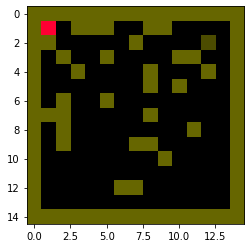

In [27]:
arr = plot_obs(obs)

In [55]:
# img = py_env.render('rgb_array')
# plt.imshow(img)

In [59]:
def run_agent_on_env_manual(actions, tf_env, py_env):
    steps = []
    # make the environment
    timestep = tf_env.reset_agent()
    steps.append(timestep)

    for i in actions:
        steps.append(tf_env.step(i))
        py_env.capture_frame()
        
    print(actions)
    return np.array(rewards)

In [60]:
def run_agent_on_env(agent, tf_env, py_env):
    done = False
    rewards = []

    # make the environment
    timestep = tf_env.reset_agent()
    policy_state = agent.get_initial_state(1)

    plt.imshow(tf_env.render()[0])
    # plt.show()
 
    actions = []
    steps = [timestep]
    
    #   while not done:
    for i in range(100):
        policy_step = agent.action(timestep, policy_state=policy_state)

        policy_state = policy_step.state
        actions.append(policy_step.action.numpy()[0])

        timestep = tf_env.step(policy_step.action)
        _, rew, disc, obs = timestep
        steps.append(timestep)

        rewards.append(rew.numpy()[0])
        py_env.capture_frame()
        
    print(actions)
    print(rewards)
 
    return steps

# Test agent

In [61]:
# agent = load_agent("/home/ddobre/Projects/game_theory/saved_models/static_apr22/policy_saved_model/agent/0/policy_000499950/")
# agent = load_agent("/home/ddobre/Projects/game_theory/saved_models/static_apr22/policy_saved_model/adversary_agent/0/policy_000499950/")
agent = load_agent("/home/ddobre/Projects/game_theory/saved_models/baseline/policy_000230700/")


In [64]:
sequence=[24, 0, 2, 3, 4, 7, 8, 13, 19, 27, 30, 35, 36, 41, 46, 50, 59, 61, 66, 69, 78, 79, 85, 92, 101, 105, 110, 111, 125, 148]  # maze
sequence=[12, 0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]  # corridor
sequence = [71, 111, 42, 43, 44, 45, 46, 47, 48, 55, 61, 68, 74, 81, 84, 85, 87, 94, 100, 107, 113, 120, 121, 122, 123, 124, 125, 126]

# sequence = [74, 70] #, 56, 57, 58, 59, 60, 61, 62, 69, 75, 82, 88, 95, 96, 97, 98, 99, 100, 101]


corridor = AdvEnv(sequence=sequence, #colors=None,
#                   colors=[1, 6, 9],  # wall, goal, floor: gray, green, black
                  video_fp="videos/baseline_charlie_static.mp4")

[2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


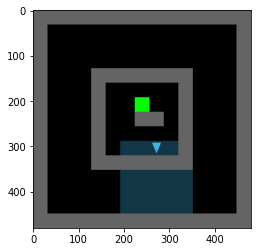

In [65]:
pyenv, tfenv = corridor.adversarial_steps()
steps = run_agent_on_env(agent, tfenv, pyenv)

In [66]:
corridor.close()

In [111]:
steps[0][3]

OrderedDict([('direction',
              <tf.Tensor: shape=(1, 1), dtype=uint8, numpy=array([[0]], dtype=uint8)>),
             ('image',
              <tf.Tensor: shape=(1, 5, 5, 3), dtype=uint8, numpy=
              array([[[[0, 0, 0],
                       [0, 0, 0],
                       [4, 4, 0],
                       [0, 0, 0],
                       [4, 4, 0]],
              
                      [[0, 0, 0],
                       [0, 0, 0],
                       [4, 4, 0],
                       [0, 0, 0],
                       [0, 0, 0]],
              
                      [[0, 0, 0],
                       [0, 0, 0],
                       [4, 4, 0],
                       [0, 0, 0],
                       [0, 0, 0]],
              
                      [[0, 0, 0],
                       [0, 0, 0],
                       [4, 4, 0],
                       [4, 4, 0],
                       [4, 4, 0]],
              
                      [[0, 0, 0],
                  

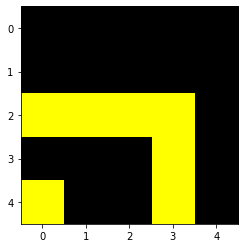

In [110]:
plot_obs(steps[0][3])

# Try generating an environment wtih the Adversary

In [16]:
env_agent = load_agent("/home/ddobre/Projects/game_theory/saved_models/static_apr22/policy_saved_model/adversary_env//0/policy_000499950/")

INFO:tensorflow:Enabling eager execution


INFO:tensorflow:Enabling eager execution


INFO:tensorflow:Enabling v2 tensorshape


INFO:tensorflow:Enabling v2 tensorshape


INFO:tensorflow:Enabling resource variables


INFO:tensorflow:Enabling resource variables


INFO:tensorflow:Enabling tensor equality


INFO:tensorflow:Enabling tensor equality


INFO:tensorflow:Enabling control flow v2


INFO:tensorflow:Enabling control flow v2


In [48]:
corridor = AdvEnv(adversary_agent=env_agent,
                  video_fp="videos/adversary_env.mp4")

INFO:tensorflow:Enabling eager execution


INFO:tensorflow:Enabling eager execution


INFO:tensorflow:Enabling v2 tensorshape


INFO:tensorflow:Enabling v2 tensorshape


INFO:tensorflow:Enabling resource variables


INFO:tensorflow:Enabling resource variables


INFO:tensorflow:Enabling tensor equality


INFO:tensorflow:Enabling tensor equality


INFO:tensorflow:Enabling control flow v2


INFO:tensorflow:Enabling control flow v2


In [49]:
py_env, tf_env = corridor.adversarial_steps()

[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 70, 46, 46, 46, 70, 46, 46, 46, 108, 70, 108]


In [50]:
py_env, tf_env = corridor.adversarial_steps()

[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 70, 46, 46, 70, 108, 46, 46, 70, 108, 46, 46, 46, 70, 108]


In [51]:
py_env, tf_env = corridor.adversarial_steps()

[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 70, 46, 46]


In [52]:
py_env, tf_env = corridor.adversarial_steps()

[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 70, 46, 46]


In [53]:
py_env, tf_env = corridor.adversarial_steps()

[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 70, 46, 46, 46, 46, 46, 46, 46, 108, 70, 46]


In [54]:
corridor.close()